<a href="https://colab.research.google.com/github/kcms2ll/AI-Study/blob/main/ETest/src/optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/rabbit_challenge/DNN_code')
sys.path.append('/content/drive/MyDrive/rabbit_challenge/DNN_code/lesson_2')

import numpy as np
import matplotlib.pyplot as plt
from common import functions

import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer

# 学習率最適化手法

## モメンタム

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.09
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.07
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.14
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.14
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.08
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.14
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.1
                : 110. 正答率(テスト) = 0.101
Generation: 120. 正答率(トレーニング) = 0.07
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.06
                : 130. 正答率(テスト) = 0.1135
Generatio

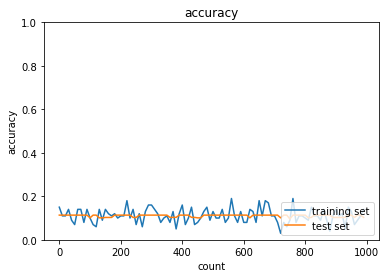

In [3]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## AdaGrad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1094
Generation: 20. 正答率(トレーニング) = 0.07
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.15
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.05
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.19
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.08
                : 70. 正答率(テスト) = 0.098
Generation: 80. 正答率(トレーニング) = 0.08
                : 80. 正答率(テスト) = 0.098
Generation: 90. 正答率(トレーニング) = 0.14
                : 90. 正答率(テスト) = 0.1028
Generation: 100. 正答率(トレーニング) = 0.1
                : 100. 正答率(テスト) = 0.1028
Generation: 110. 正答率(トレーニング) = 0.11
                : 110. 正答率(テスト) = 0.1028
Generation: 120. 正答率(トレーニング) = 0.15
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.1
                : 130. 正答率(テスト) = 0.1135
Generation:

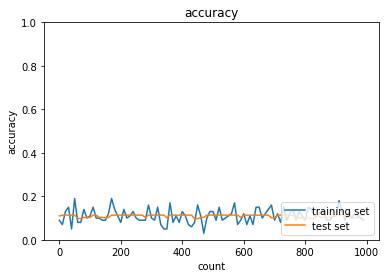

In [4]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSProp

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.21
                : 10. 正答率(テスト) = 0.1768
Generation: 20. 正答率(トレーニング) = 0.23
                : 20. 正答率(テスト) = 0.1806
Generation: 30. 正答率(トレーニング) = 0.21
                : 30. 正答率(テスト) = 0.2188
Generation: 40. 正答率(トレーニング) = 0.3
                : 40. 正答率(テスト) = 0.1995
Generation: 50. 正答率(トレーニング) = 0.26
                : 50. 正答率(テスト) = 0.2369
Generation: 60. 正答率(トレーニング) = 0.38
                : 60. 正答率(テスト) = 0.2849
Generation: 70. 正答率(トレーニング) = 0.4
                : 70. 正答率(テスト) = 0.2901
Generation: 80. 正答率(トレーニング) = 0.38
                : 80. 正答率(テスト) = 0.3461
Generation: 90. 正答率(トレーニング) = 0.52
                : 90. 正答率(テスト) = 0.4889
Generation: 100. 正答率(トレーニング) = 0.55
                : 100. 正答率(テスト) = 0.5523
Generation: 110. 正答率(トレーニング) = 0.63
                : 110. 正答率(テスト) = 0.6102
Generation: 120. 正答率(トレーニング) = 0.71
                : 120. 正答率(テスト) = 0.6926
Generation: 130. 正答率(トレーニング) = 0.7
                : 130. 正答率(テスト) = 0.6923
Generation

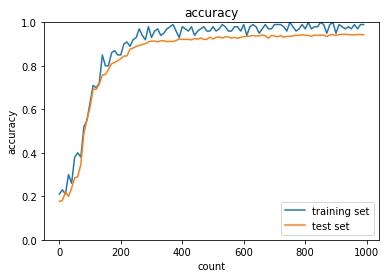

In [5]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.21
                : 20. 正答率(テスト) = 0.2261
Generation: 30. 正答率(トレーニング) = 0.23
                : 30. 正答率(テスト) = 0.2293
Generation: 40. 正答率(トレーニング) = 0.24
                : 40. 正答率(テスト) = 0.2299
Generation: 50. 正答率(トレーニング) = 0.25
                : 50. 正答率(テスト) = 0.2324
Generation: 60. 正答率(トレーニング) = 0.46
                : 60. 正答率(テスト) = 0.3729
Generation: 70. 正答率(トレーニング) = 0.5
                : 70. 正答率(テスト) = 0.4135
Generation: 80. 正答率(トレーニング) = 0.46
                : 80. 正答率(テスト) = 0.4606
Generation: 90. 正答率(トレーニング) = 0.46
                : 90. 正答率(テスト) = 0.5194
Generation: 100. 正答率(トレーニング) = 0.69
                : 100. 正答率(テスト) = 0.6071
Generation: 110. 正答率(トレーニング) = 0.67
                : 110. 正答率(テスト) = 0.6733
Generation: 120. 正答率(トレーニング) = 0.75
                : 120. 正答率(テスト) = 0.7061
Generation: 130. 正答率(トレーニング) = 0.74
                : 130. 正答率(テスト) = 0.776
Generatio

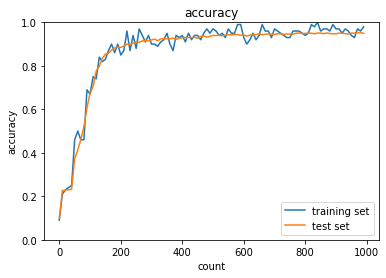

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 学習率を変えてみる

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08
                : 10. 正答率(テスト) = 0.1309
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.1345
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1434
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1175
Generation: 50. 正答率(トレーニング) = 0.15
                : 50. 正答率(テスト) = 0.1315
Generation: 60. 正答率(トレーニング) = 0.27
                : 60. 正答率(テスト) = 0.1818
Generation: 70. 正答率(トレーニング) = 0.23
                : 70. 正答率(テスト) = 0.1836
Generation: 80. 正答率(トレーニング) = 0.16
                : 80. 正答率(テスト) = 0.2092
Generation: 90. 正答率(トレーニング) = 0.26
                : 90. 正答率(テスト) = 0.2514
Generation: 100. 正答率(トレーニング) = 0.28
                : 100. 正答率(テスト) = 0.2734
Generation: 110. 正答率(トレーニング) = 0.3
                : 110. 正答率(テスト) = 0.3066
Generation: 120. 正答率(トレーニング) = 0.28
                : 120. 正答率(テスト) = 0.3343
Generation: 130. 正答率(トレーニング) = 0.31
                : 130. 正答率(テスト) = 0.3232
Generati

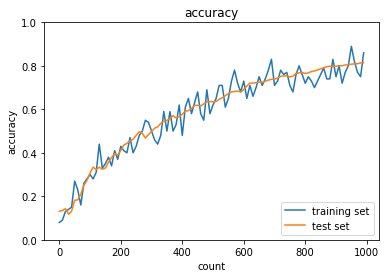

In [7]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.3,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

学習率を0.01→0.3にすると、学習できるようになった。